In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
url = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),'Mutual_Funds.csv')

In [9]:
url

'/Users/deepatamraparani/code/tamraparani/P02-mutual-funds/Mutual_Funds.csv'

In [11]:
# Read Mutual File

mf = pd.read_csv(url)
mf.shape

(29033646, 7)

In [13]:
#First 5 Records
mf.head(100)

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,Date,NAV
0,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,29-05-2008,10.7205
1,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,28-05-2008,10.7250
2,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,27-05-2008,10.7216
3,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,26-05-2008,10.7206
4,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,23-05-2008,10.7152
...,...,...,...,...,...,...,...
95,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,08-01-2008,10.9111
96,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,07-01-2008,10.9162
97,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,04-01-2008,10.8790
98,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,03-01-2008,10.8614


In [12]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29033646 entries, 0 to 29033645
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Fund_House       object 
 1   Scheme_Type      object 
 2   Scheme_Category  object 
 3   Scheme_Code      int64  
 4   Scheme_Name      object 
 5   Date             object 
 6   NAV              float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.5+ GB


In [14]:
mf.describe()

,Scheme_Code,NAV
count,2.903365e+07,2.903365e+07
mean,1.222114e+05,1.802385e+02
std,1.532330e+04,4.014989e+03
min,1.000270e+05,-6.796493e+03
25%,1.082730e+05,1.048240e+01
50%,1.198620e+05,1.219160e+01
75%,1.355680e+05,2.544830e+01
max,1.518760e+05,1.918470e+06


In [15]:
# Get no of Mutual Fund Schemes
print("Number of Schemes are:",len(set(mf['Scheme_Name'])))

Number of Schemes are: 35350


In [17]:
unique_schemes = mf['Scheme_Name'].unique()
unique_fund_houses = mf['Fund_House'].unique()

num_unique_schemes = len(unique_schemes)
num_unique_fund_houses = len(unique_fund_houses)

print("Number of unique schemes:", num_unique_schemes)
print("Number of unique fund houses:", num_unique_fund_houses)

Number of unique schemes: 35350
Number of unique fund houses: 70


In [18]:
scheme_to_fundhouse_mapping = mf[['Scheme_Name', 'Fund_House']].drop_duplicates()


In [19]:
scheme_to_fundhouse_mapping

,Scheme_Name,Fund_House
0,Grindlays Super Saver Income Fund-GSSIF-Half Y...,Standard Chartered Mutual Fund
531,Grindlays Super Saver Income Fund-GSSIF-Quater...,Standard Chartered Mutual Fund
1062,Grindlays Super Saver Income Fund-GSSIF-Growth,Standard Chartered Mutual Fund
1593,Grindlays Super Saver Income Fund-GSSIF-Annual...,Standard Chartered Mutual Fund
2124,Grindlays Super Saver Income Fund-GSSIF - ST-D...,Standard Chartered Mutual Fund
...,...,...
29033626,NAVI Overnight Fund Regular Plan Daily IDCW Re...,Navi Mutual Fund
29033630,NAVI Overnight Fund Regular Plan Weekly IDCW R...,Navi Mutual Fund
29033634,NAVI Overnight Fund Direct Plan Monthly IDCW R...,Navi Mutual Fund
29033638,NAVI Overnight Fund Direct Plan Growth,Navi Mutual Fund


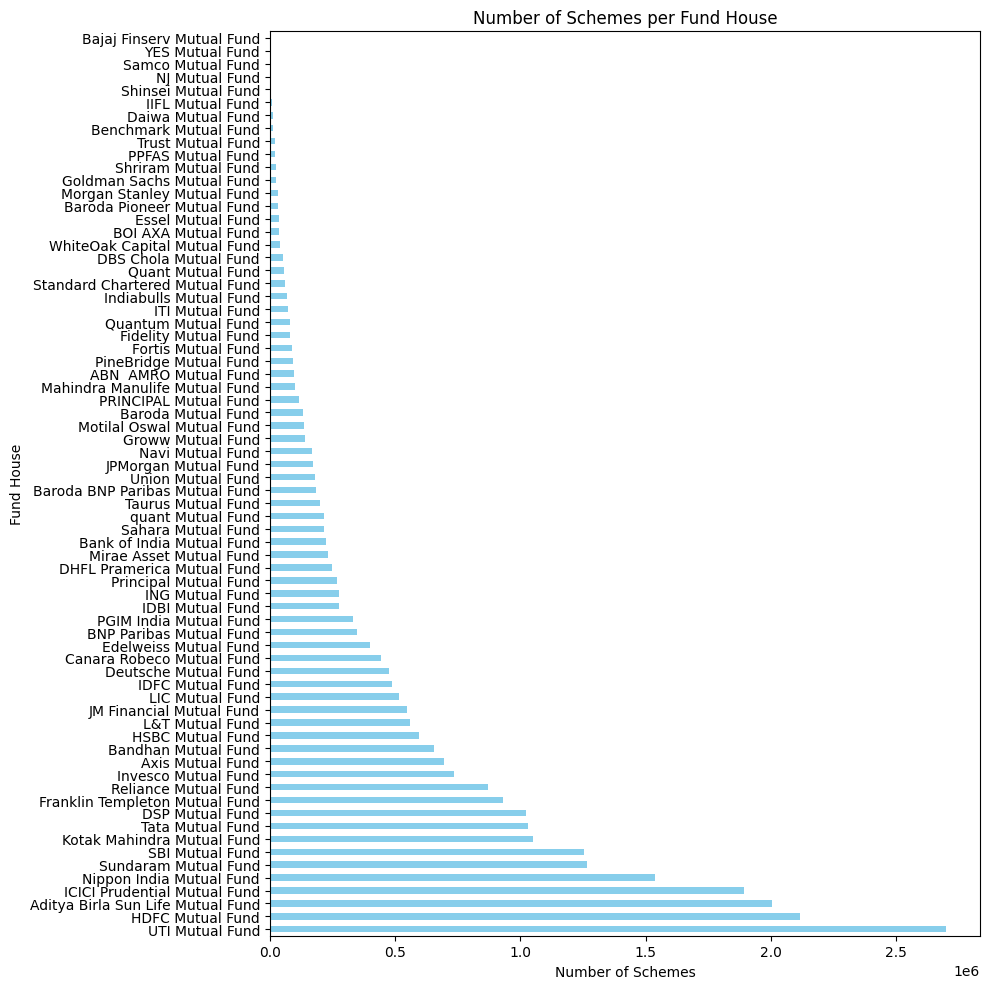

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

fundhouse_scheme_counts = scheme_to_fundhouse_mapping['Fund_House'].value_counts()

# Count the number of schemes per fund house
fundhouse_scheme_counts = mf['Fund_House'].value_counts()

# Plotting a horizontal bar plot
plt.figure(figsize=(10, 10))
fundhouse_scheme_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Schemes')
plt.ylabel('Fund House')
plt.title('Number of Schemes per Fund House')
plt.tight_layout()

# Display plot
plt.show()


In [38]:
mf['Date'] = pd.to_datetime(mf['Date'],format= '%d-%m-%Y')

In [39]:
schemes = mf[['Scheme_Code','Date']].sort_values('Date').groupby('Scheme_Code')

In [63]:
# Get the last date for each scheme
last_dates = schemes.max()
last_dates

,Date
Scheme_Code,
100027,2008-05-29
100028,2008-05-29
100029,2008-05-29
100030,2008-05-29
100031,2008-05-29
...,...
151870,2023-07-21
151873,2023-07-21
151874,2023-07-21


In [70]:
schemes_last_day = last_dates[last_dates['Date'] == '2023-07-21']
schemes_last_day

,Date
Scheme_Code,
100033,2023-07-21
100034,2023-07-21
100037,2023-07-21
100038,2023-07-21
100041,2023-07-21
...,...
151870,2023-07-21
151873,2023-07-21
151874,2023-07-21


In [91]:
schemes_last_day = schemes.nth(-1)
schemes_last_day = schemes_last_day[schemes_last_day['Date']== '2023-07-21']
schemes_last_day = schemes_last_day.reset_index()

In [94]:
relevant_schemes = schemes_last_day['Scheme_Code']

In [98]:
mf = mf[mf['Scheme_Code'].isin(relevant_schemes)]

In [99]:
#Scheme Type is the same, however, Scheme Category and Scheme Code are different
mf[mf['Scheme_Name'] == 'CPSE ETF']

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,Date,NAV
23323182,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-07-21,44.9035
23323183,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-07-20,44.7496
23323184,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-07-19,44.6004
23323185,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-07-18,44.2261
23323186,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2023-07-17,44.2407
...,...,...,...,...,...,...,...
23324833,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2016-11-11,25.2945
23324834,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2016-11-10,25.8562
23324835,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2016-11-09,25.1566
23324836,Nippon India Mutual Fund,Open Ended Schemes,Other Scheme - Other ETFs,140107,CPSE ETF,2016-11-08,25.1505


In [100]:
#For this Scheme Name, Scheme Type is the same, Also Scheme Category is Income, but Scheme Code is different. 
#That means same Scheme name exists in two different funds but have different scheme codes.
mf[mf['Scheme_Name'] == 'GFRF (Dividend - Weekly)']

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,Date,NAV


In [16]:
csv_path_YES = '/kaggle/working/YES Mutual Fund data.csv'
csv_path_Trust = '/kaggle/working/Trust Mutual Fund data.csv'
mf[mf['Fund_House'] == 'YES Mutual Fund'].to_csv(csv_path_YES, index=False) 
mf[mf['Fund_House'] == 'Trust Mutual Fund'].to_csv(csv_path_Trust, index=False) 


/tmp/ipykernel_32/2790146710.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


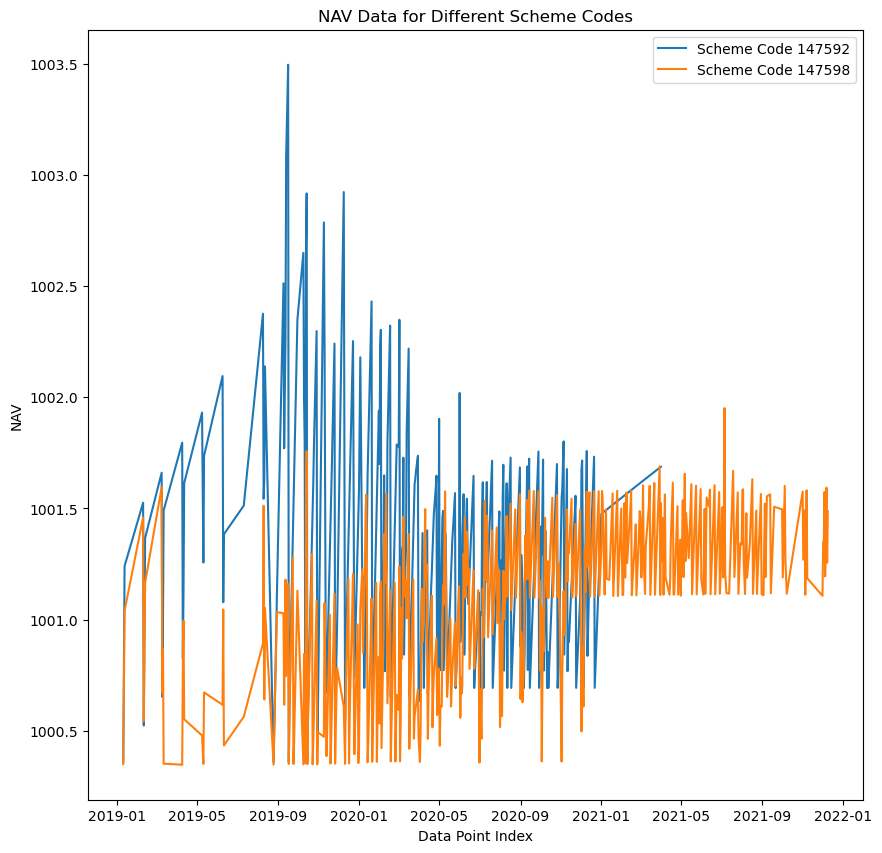

In [37]:
#We are checking timeseries of only one simple fundhouse with 2 schemes for stationarity 
df = pd.read_csv(csv_path_YES, header=0)
df['Date'] = pd.to_datetime(df['Date'])
#y = df.NAV
grouped = df.groupby('Scheme_Code')
plt.figure(figsize=(10, 10))  # Set the figure size
for scheme_code, group_data in grouped:
    #sorted the date in order for us to plot the NAV 
    #in ascending order of the dates for forecasting future
    group_data = group_data.sort_values(by='Date') 
    plt.plot(group_data.Date, group_data['NAV'], label=f'Scheme Code {scheme_code}')

plt.xlabel('Data Point Index')
plt.ylabel('NAV')
plt.title('NAV Data for Different Scheme Codes')
plt.legend()
plt.show()

In [40]:
from statsmodels.tsa.stattools import adfuller
for scheme_code, group_data in grouped:
    y = group_data['NAV']
    #first degree p-value comes as non stationary
    print('p-value: ', adfuller(y)[1])

p-value:  4.8459696037068034e-05
p-value:  0.8863842627320053


In [42]:
#second degree p-value comes as non stationary
for scheme_code, group_data in grouped:
    y = group_data['NAV']
    print('p-value: ', adfuller(y.diff(1).fillna(0))[1])
    #WE ARE EXPECTING p-value to be less than 0.05 for the series to be stationary.

p-value:  2.6249398282597388e-11
p-value:  2.2530231302554644e-12


In [43]:
#third degree p-value comes as non stationary
for scheme_code, group_data in grouped:
    y = group_data['NAV']
    print('p-value: ', adfuller(y.diff(1).diff(1).fillna(0))[1])
    #WE ARE EXPECTING p-value to be less than 0.05 for the series to be stationary.

p-value:  5.453152693964354e-24
p-value:  5.223780080866114e-23


In [56]:
#third degree p-value comes as non stationary
for scheme_code, group_data in grouped:
    y = group_data['NAV']
    print('p-value: ', adfuller(y.diff(3).fillna(0))[1])
    #WE ARE EXPECTING p-value to be less than 0.05 for the series to be stationary. 
    #So this is very bad result.

p-value:  1.450291993904362e-11
p-value:  1.0650935950544626e-15


In [ ]:
#Computing return on the entire mutual fund dataset maintaing the descending order of teh date. Hence the -1
# Filter Records where NAV is 0
mf = mf[mf['NAV']!=0]
# Compute Returns
mf['return']=mf.groupby(['Scheme_Name'])['NAV'].pct_change(periods=-1)


In [ ]:
import matplotlib.pyplot as plt
import ydata_profiling as pp
import seaborn as sns
import warnings
import os

pp.ProfileReport(mf)

In [ ]:
# Convert Date Column as String to Date format
mf['Date'] = pd.to_datetime(mf['Date'],format='%d-%m-%Y')
mf.head(5)

In [66]:
df = df[df['NAV']!=0]
df['Date'] = pd.to_datetime(df['Date'])


# Reset index since now df has index as scheme_code and column as scheme_code leading to confusion 
#to compute returns
df.reset_index(drop=True, inplace=True)


# Group the data by the scheme code and sort within each group
df = df.groupby('Scheme_Code').apply(lambda x: x.sort_values(by='Date'))



# Compute Returns within each group
df['return'] = df.groupby('Scheme_Code')['NAV'].transform(lambda x: x.pct_change(periods=1))

# Reset index if needed
#df.reset_index(drop=True, inplace=True)
#print(df)



/tmp/ipykernel_32/3622157922.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('Scheme_Code').apply(lambda x: x.sort_values(by='Date'))


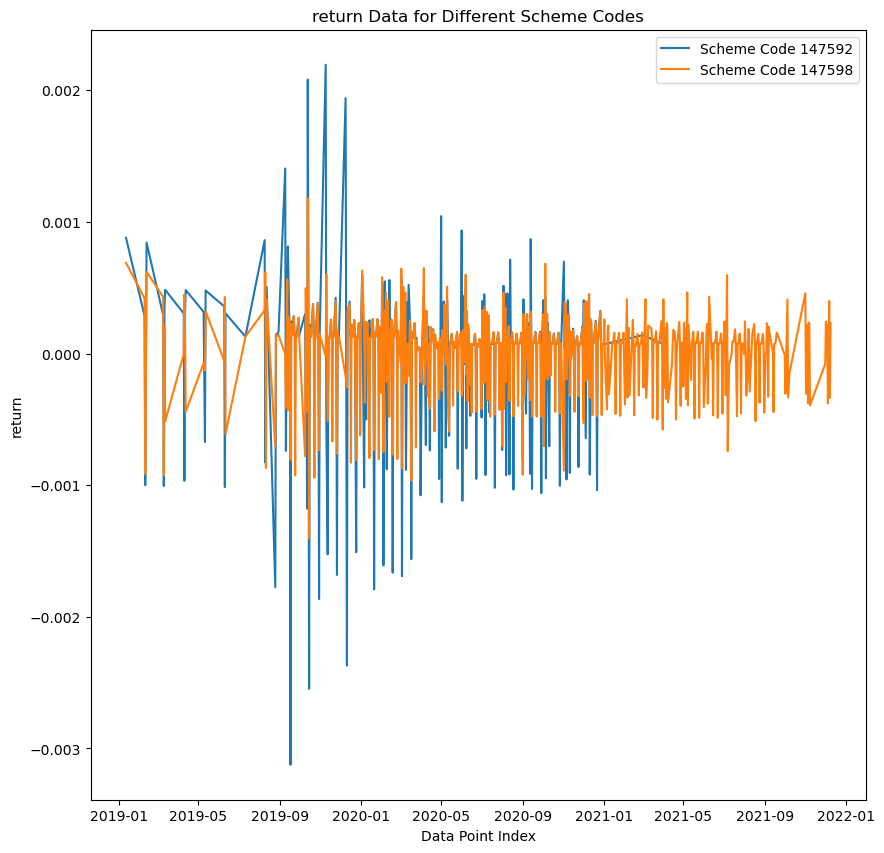

In [70]:
#We are checking timeseries of only one simple fundhouse with 2 schemes for stationarity.
#Here we will compute the returns column based on NAV and use it to find stationarity
#useing the same df from above. Removed teh first record where returns will be Nan
df = df.dropna(subset=['return'])
df = df[df['return']!=0]
y = df['return'] 
grouped = df.groupby('Scheme_Code')
plt.figure(figsize=(10, 10))  # Set the figure size
for scheme_code, group_data in grouped:
    #sorted the date in order for us to plot the NAV 
    #in ascending order of the dates for forecasting future
    #group_data = group_data.sort_values(by='Date') #Done already
    plt.plot(group_data.Date, group_data['return'], label=f'Scheme Code {scheme_code}')

plt.xlabel('Data Point Index')
plt.ylabel('return')
plt.title('return Data for Different Scheme Codes')
plt.legend()
plt.show()

In [71]:
from statsmodels.tsa.stattools import adfuller
grouped = df.groupby('Scheme_Code')
for scheme_code, group_data in grouped:
    y = group_data['return']
    #first degree p-value comes as non stationary
    print('p-value: ', adfuller(y)[1])

p-value:  2.919897112414874e-17
p-value:  9.4506537329687e-21


In [80]:
from statsmodels.tsa.stattools import adfuller
grouped = df.groupby('Scheme_Code')
for scheme_code, group_data in grouped:
    y = group_data['return']
    #first degree p-value comes as non stationary
    print('p-value: ', adfuller(y)[1])

p-value:  2.919897112414874e-17
p-value:  9.4506537329687e-21


In [76]:
#second degree p-value comes as non stationary
for scheme_code, group_data in grouped:
    y = group_data['return']
    print('p-value: ', adfuller(y.diff(1).diff(1).fillna(0))[1])
    #WE ARE EXPECTING p-value to be less than 0.05 for the series to be stationary.

p-value:  8.74860563736392e-22
p-value:  9.175009124030404e-16


In [83]:
from statsmodels.tsa.arima.model import ARIMA
arima_list = []
for scheme_code, group_data in grouped:
    y = group_data['return']
    # 1. initialize the model
    arima = ARIMA(y, order=(1, 1, 2), trend='t')

    # 2. fit the models
    arima = arima.fit()
    arima_list.append(arima)

    print(arima.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  402
Model:                 ARIMA(1, 1, 2)   Log Likelihood                2318.568
Date:                Tue, 22 Aug 2023   AIC                          -4627.135
Time:                        22:34:46   BIC                          -4607.165
Sample:                             0   HQIC                         -4619.228
                                - 402                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -6.384e-06   2.66e-05     -0.240      0.810   -5.85e-05    4.58e-05
ar.L1         -0.5746      0.136     -4.236      0.000      -0.840      -0.309
ma.L1      -2.529e-07      0.125  -2.02e-06      1.0

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 return   No. Observations:                  610
Model:                 ARIMA(1, 1, 2)   Log Likelihood                3865.942
Date:                Tue, 22 Aug 2023   AIC                          -7721.883
Time:                        22:34:47   BIC                          -7699.824
Sample:                             0   HQIC                         -7713.302
                                - 610                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -6.284e-06   1.36e-05     -0.462      0.644   -3.29e-05    2.04e-05
ar.L1         -0.4750      0.168     -2.835      0.005      -0.803      -0.147
ma.L1      -1.254e-07      0.157  -7.97e-07      1.0

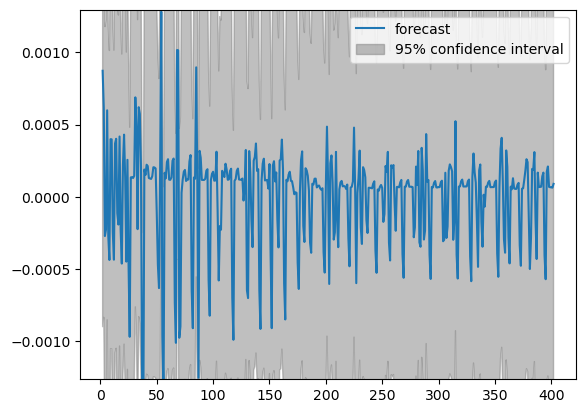

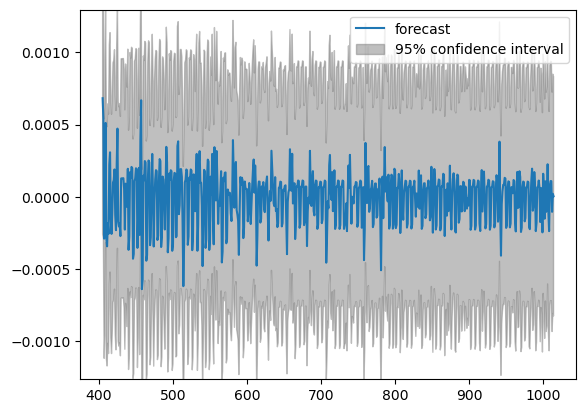

In [84]:
from statsmodels.graphics.tsaplots import plot_predict
# Actual vs Fitted
for arima in arima_list:
    plot_predict(arima, start=1, dynamic=False);
    plt.ylim((.9 * y.min(), 1.1 * y.max()));

Clearly returns was not stationary as well. Let us use the same approach but, instead of returns, we compute logarithamic returns of NAV below

In [86]:
df = df[df['NAV']!=0]
df['Date'] = pd.to_datetime(df['Date'])


# Reset index since now df has index as scheme_code and column as scheme_code leading to confusion 
#to compute returns
df.reset_index(drop=True, inplace=True)


# Group the data by the scheme code and sort within each group
df = df.groupby('Scheme_Code').apply(lambda x: x.sort_values(by='Date'))



# Calculate logarithmic returns
df['Log_Return'] = df.groupby('Scheme_Code')['NAV'].apply(lambda x: np.log(x / x.shift(1)))

# Reset index if needed
#df.reset_index(drop=True, inplace=True)


           Fund_House         Scheme_Type               Scheme_Category  \
0     YES Mutual Fund  Open Ended Schemes  Debt Scheme - Overnight Fund   
1     YES Mutual Fund  Open Ended Schemes  Debt Scheme - Overnight Fund   
2     YES Mutual Fund  Open Ended Schemes  Debt Scheme - Overnight Fund   
3     YES Mutual Fund  Open Ended Schemes  Debt Scheme - Overnight Fund   
4     YES Mutual Fund  Open Ended Schemes  Debt Scheme - Overnight Fund   
...               ...                 ...                           ...   
1007  YES Mutual Fund  Open Ended Schemes  Debt Scheme - Overnight Fund   
1008  YES Mutual Fund  Open Ended Schemes  Debt Scheme - Overnight Fund   
1009  YES Mutual Fund  Open Ended Schemes  Debt Scheme - Overnight Fund   
1010  YES Mutual Fund  Open Ended Schemes  Debt Scheme - Overnight Fund   
1011  YES Mutual Fund  Open Ended Schemes  Debt Scheme - Overnight Fund   

      Scheme_Code                                        Scheme_Name  \
0          147592  YES Over

/tmp/ipykernel_32/513682282.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('Scheme_Code').apply(lambda x: x.sort_values(by='Date'))
/tmp/ipykernel_32/513682282.py:16: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['Log_Return'] = df.groupby('Scheme_Code')['NAV'].apply(lam

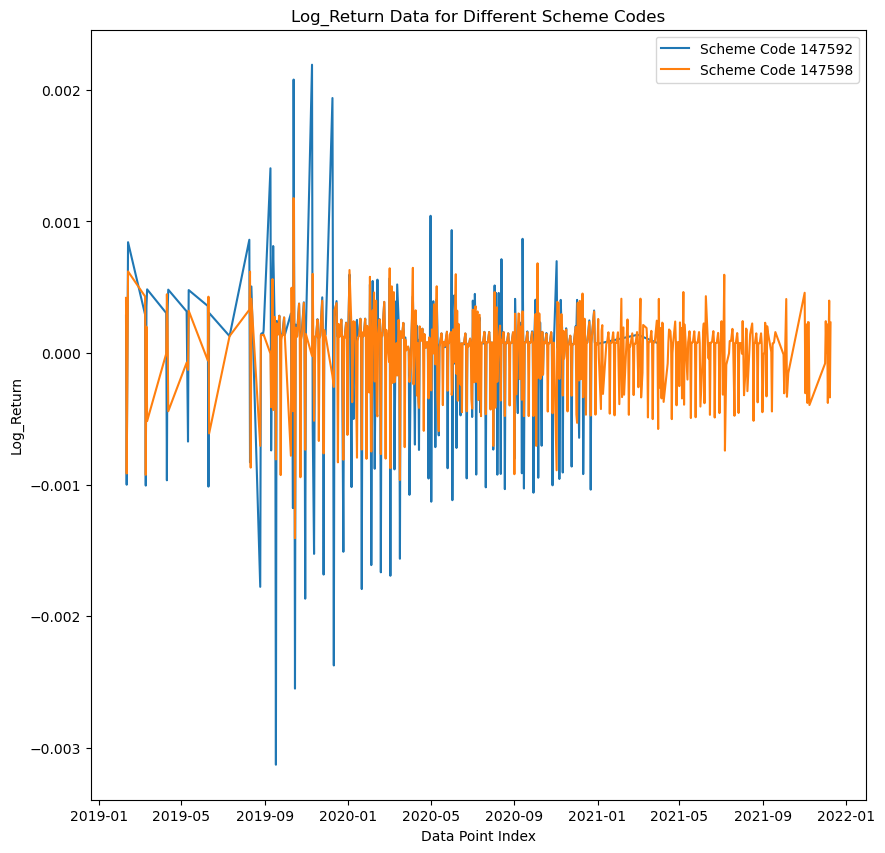

In [87]:
#We are checking timeseries of only one simple fundhouse with 2 schemes for stationarity.
#Here we will compute the LOG of returns column based on NAV and use it to find stationarity
#useing the same df from above. Removed teh first record where returns will be Nan
df = df.dropna(subset=['Log_Return'])
df = df[df['Log_Return']!=0]
y = df['Log_Return'] 
grouped = df.groupby('Scheme_Code')
plt.figure(figsize=(10, 10))  # Set the figure size
for scheme_code, group_data in grouped:
    #sorted the date in order for us to plot the NAV 
    #in ascending order of the dates for forecasting future
    #group_data = group_data.sort_values(by='Date') #Done already
    plt.plot(group_data.Date, group_data['Log_Return'], label=f'Scheme Code {scheme_code}')

plt.xlabel('Data Point Index')
plt.ylabel('Log_Return')
plt.title('Log_Return Data for Different Scheme Codes')
plt.legend()
plt.show()

In [88]:
from statsmodels.tsa.stattools import adfuller
grouped = df.groupby('Scheme_Code')
for scheme_code, group_data in grouped:
    y = group_data['Log_Return']
    #first degree p-value comes as non stationary
    print('p-value: ', adfuller(y)[1])

p-value:  1.568095188314618e-17
p-value:  7.711961223679314e-21


In [89]:
#second degree p-value comes as non stationary
for scheme_code, group_data in grouped:
    y = group_data['Log_Return']
    print('p-value: ', adfuller(y.diff(1).diff(1).fillna(0))[1])
    #WE ARE EXPECTING p-value to be less than 0.05 for the series to be stationary.

p-value:  1.3395240142611255e-23
p-value:  1.329929424923086e-28


Well apparently, these p values are super small since beginning and are indicating stationarity. Notice teh e-x, #Double Check

In [ ]:
# Analysis of quant Tax Plan - Growth Option - Regular Plan
analysis_df = mf[mf['Scheme_Name']=='quant Tax Plan - Growth Option - Regular Plan'][['Scheme_Name','Date','NAV','return']]
analysis_df.sort_values('Date',inplace=True)
analysis_df = analysis_df.set_index('Date')
Portfolio = analysis_df['Scheme_Name'][1]
analysis_df.plot(y='NAV',kind='line',figsize=(15,5))
plt.xlabel('Period')
plt.ylabel('NAV')
plt.title('Plot of NAV over Time for ' + Portfolio)
plt.show()

In [ ]:
analysis_df

In [ ]:
# Compute correlation matrix
corr = mf.corr()

# Generate heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm')

# Add title
plt.title('Correlation Matrix Heatmap')

# Show plot
plt.show()
